# Pruebas Proyecto Marcha - Optimización Hiperparametros

Realizado por: Mario E. Otero A.                                          

LinkedIn: https://www.linkedin.com/in/marioeoteroa/         

Github: https://github.com/marioeoteroa/ProyectoMarcha

## Optimización de Hiperparametros

In [ ]:
# Importar librerías aquí

import glob
import os
import numpy as np 
import pandas as pd 
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from matplotlib.pyplot import figure

In [ ]:
pip install openpyxl

     |████████████████████████████████| 242 kB 17.8 MB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#all_files = glob.glob('/work/GWALK/*.xlsx')
#all_files = glob.glob('/work/GWALK.xlsx')
#all_files = glob.glob('/work/AW/*.xlsx')
#all_files = glob.glob('/work/IMU/*.xlsx')
all_files = glob.glob('/work/*.xlsx')
len(all_files)

37

In [ ]:
print(all_files)

['/work/GWALKVelAngularNoLineal.xlsx', '/work/GWALKEspacial.xlsx', '/work/AWR.xlsx', '/work/IMUR.xlsx', '/work/AWAccLinealEspacial.xlsx', '/work/AWREspacial.xlsx', '/work/GWALKVelAngularEspacial.xlsx', '/work/GWALKNoLineal.xlsx', '/work/IMU.xlsx', '/work/AW.xlsx', '/work/AWRNoLineal.xlsx', '/work/AWAccLinealNoLineal.xlsx', '/work/AWLVelAngularNoLineal.xlsx', '/work/IMUL.xlsx', '/work/AWRAccLinealEspacial.xlsx', '/work/IMURVelAngularEspacial.xlsx', '/work/AWL.xlsx', '/work/IMUVelAngularNoLineal.xlsx', '/work/AWVelAngularEspacial.xlsx', '/work/AWEspacial.xlsx', '/work/IMULVelAngularNoLineal.xlsx', '/work/AWRVelAngularEspacial.xlsx', '/work/AWLEspacial.xlsx', '/work/GWALKAccLinealEspacial.xlsx', '/work/AWLAccLinealEspacial.xlsx', '/work/AWVelAngularNoLineal.xlsx', '/work/IMULVelAngularEspacial.xlsx', '/work/AWNoLineal.xlsx', '/work/AWRVelAngularNoLineal.xlsx', '/work/AWRAccLinealNoLineal.xlsx', '/work/AWLVelAngularEspacial.xlsx', '/work/IMURVelAngularNoLineal.xlsx', '/work/IMUVelAngularEs

In [ ]:
targets = pd.read_excel('/work/Target/ParametrosMarchaNUEVO.xlsx')
#targets.head()

In [ ]:
#Observar el tamaño del dataset

targets.shape

(591, 3)

### Decision Tree

In [ ]:
#Se definen los hiperparametros a optimizar
max_depth = 2 #ponerlo de 10 en 10 hasta 100
minsamplesplit = 2 #dejarlo de 1 en 1 hasta 10
minsampleleaf = 2 #dejarlo de 1 en 1 hasta 10

param_grid = {"model__max_depth": list(range(1, max_depth+1)),
              "model__min_samples_split": list(range(1, minsamplesplit+1)),
              "model__min_samples_leaf": list(range(1, minsampleleaf+1))
                                        }

In [ ]:
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

DataDecisionTree = []
DataDecisionTreeINDIVIDUAL = []

for f in all_files:
    train_features = pd.read_excel(f)
    # Train, test split.
    data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
    X_train, X_test, targets_train, targets_test = data_split

    # Find the best model per target.
    for target in range(targets.shape[1]):
        # Getting the target.
        y_train = targets_train.iloc[:, target]
        y_test = targets_test.iloc[:, target]

    # Model definition.
        pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                          ("model", DecisionTreeRegressor(random_state=4444))])
    # By default GridSearchCV uses a 5-kfold validation strategy.
        search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)  
        saveinfo = search.fit(X_train.values, y_train.values)
        informacion = search.cv_results_
        

    # Getting the test score.
        y_hat_test = search.predict(X_test.values)
        test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
        #print(f"Columna: {targets.columns[target]}")
        #print(f"Best CV score: {search.best_score_:0.3f}")
        #print(f"Test score: {test_score:0.3f}")
        #print(f"Best Parameters:\n {search.best_params_}")
        #print("")

    #Save stats
        DataDecisionTree.append([f,targets.columns[target],search.best_score_,test_score,search.best_params_])
        DataDecisionTreeINDIVIDUAL.append([f,targets.columns[target],informacion])


print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

print("--- %s Minutos ---" % (TIEMPO))

ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan 0.17405675        nan 0.17405675        nan 0.34490696
        nan 0.34490696]
  category=UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.7/

In [ ]:
DataDecisionTree = pd.DataFrame(DataDecisionTree)
DataDecisionTree.head(5)


,0,1,2,3,4
0,/work/GWALKVelAngularNoLineal.xlsx,Cadencia,0.230175,0.325988,"{'model__max_depth': 2, 'model__min_samples_le..."
1,/work/GWALKVelAngularNoLineal.xlsx,Velocidad,0.332975,0.414162,"{'model__max_depth': 2, 'model__min_samples_le..."
2,/work/GWALKVelAngularNoLineal.xlsx,LongitudZancada,0.354138,0.469035,"{'model__max_depth': 2, 'model__min_samples_le..."
3,/work/GWALKEspacial.xlsx,Cadencia,0.516059,0.438805,"{'model__max_depth': 2, 'model__min_samples_le..."
4,/work/GWALKEspacial.xlsx,Velocidad,0.827989,0.829707,"{'model__max_depth': 2, 'model__min_samples_le..."


In [ ]:
DataDecisionTreeINDIVIDUAL = pd.DataFrame(DataDecisionTreeINDIVIDUAL)
#DataDecisionTreeINDIVIDUAL[['mean_test_score','param_model__max_depth','param_model__min_samples_leaf','param_model__min_samples_split','params']]
#DataDecisionTreeINDIVIDUAL

,0,1,2
0,/work/GWALKVelAngularNoLineal.xlsx,Cadencia,"{'mean_fit_time': [0.002348589897155762, 0.003..."
1,/work/GWALKVelAngularNoLineal.xlsx,Velocidad,"{'mean_fit_time': [0.002553868293762207, 0.003..."
2,/work/GWALKVelAngularNoLineal.xlsx,LongitudZancada,"{'mean_fit_time': [0.0025461196899414064, 0.00..."
3,/work/GWALKEspacial.xlsx,Cadencia,"{'mean_fit_time': [0.002257561683654785, 0.004..."
4,/work/GWALKEspacial.xlsx,Velocidad,"{'mean_fit_time': [0.00386505126953125, 0.0068..."
...,...,...,...
106,/work/GWALKAccLinealNoLineal.xlsx,Velocidad,"{'mean_fit_time': [0.002486515045166016, 0.003..."
107,/work/GWALKAccLinealNoLineal.xlsx,LongitudZancada,"{'mean_fit_time': [0.0017680883407592773, 0.00..."
108,/work/AWLNoLineal.xlsx,Cadencia,"{'mean_fit_time': [0.0029078960418701173, 0.00..."
109,/work/AWLNoLineal.xlsx,Velocidad,"{'mean_fit_time': [0.0025282382965087892, 0.00..."


In [ ]:
datosguardados = pd.read_csv('/work/DataDecisionTreeFINAL.csv')
datosguardados

,Unnamed: 0,0,1,2,3,4
0,0,/work/GWALKVelAngularNoLineal.xlsx,Cadencia,0.353442,0.459562,"{'model__max_depth': 11, 'model__min_samples_l..."
1,1,/work/GWALKVelAngularNoLineal.xlsx,Velocidad,0.585710,0.554506,"{'model__max_depth': 11, 'model__min_samples_l..."
2,2,/work/GWALKVelAngularNoLineal.xlsx,LongitudZancada,0.583086,0.648186,"{'model__max_depth': 11, 'model__min_samples_l..."
3,3,/work/GWALKEspacial.xlsx,Cadencia,0.771126,0.727601,"{'model__max_depth': 11, 'model__min_samples_l..."
4,4,/work/GWALKEspacial.xlsx,Velocidad,0.927224,0.931414,"{'model__max_depth': 21, 'model__min_samples_l..."
...,...,...,...,...,...,...
106,106,/work/GWALKAccLinealNoLineal.xlsx,Velocidad,0.888886,0.899699,"{'model__max_depth': 11, 'model__min_samples_l..."
107,107,/work/GWALKAccLinealNoLineal.xlsx,LongitudZancada,0.752986,0.777364,"{'model__max_depth': 11, 'model__min_samples_l..."
108,108,/work/AWLNoLineal.xlsx,Cadencia,0.437436,0.390255,"{'model__max_depth': 11, 'model__min_samples_l..."
109,109,/work/AWLNoLineal.xlsx,Velocidad,0.447423,0.487229,"{'model__max_depth': 21, 'model__min_samples_l..."


In [ ]:
_deepnote_run_altair(datosguardados, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Unnamed: 0","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"2","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


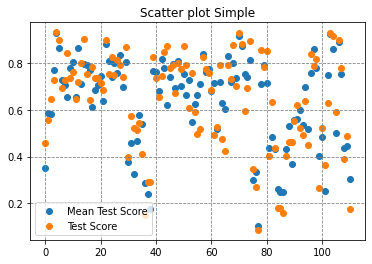

In [ ]:
x = datosguardados.iloc[:,0]
y1 = datosguardados.iloc[:,3]
y2 = datosguardados.iloc[:,4]
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.title("Scatter plot Simple")
#plt.figure(figsize=(6, 6))
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
#plt.xlim(-1, 1)
#plt.ylim(0.6, 1)
plt.legend(loc = 'upper right')
plt.legend(['Mean Test Score', 'Test Score'])
plt.show() 


In [ ]:
datosnew = datosguardados[(datosguardados["2"] > 0.8) & (datosguardados["3"] > 0.8)]
#datosnew

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


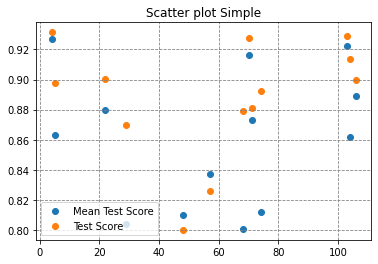

In [ ]:
plt.scatter(datosnew.iloc[:,0], datosnew.iloc[:,3])
plt.scatter(datosnew.iloc[:,0], datosnew.iloc[:,4])
plt.title("Scatter plot Simple")
#plt.figure(figsize=(6, 6))
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
#plt.xlim(-1, 1)
#plt.ylim(0.6, 1)
plt.legend(loc = 'upper right')
plt.legend(['Mean Test Score', 'Test Score'])
plt.show() 

In [ ]:
#informacion['mean_test_score']
DataDecisionTreeINDIVIDUAL.iloc[0,2]
NewDataDecisionTreeINDIVIDUAL = pd.DataFrame(DataDecisionTreeINDIVIDUAL.iloc[0,2])
NewDataDecisionTreeINDIVIDUAL = NewDataDecisionTreeINDIVIDUAL[['mean_test_score','param_model__max_depth','param_model__min_samples_leaf','param_model__min_samples_split','params']]
NewDataDecisionTreeINDIVIDUAL

,mean_test_score,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params
0,NaN,1,1,1,"{'model__max_depth': 1, 'model__min_samples_le..."
1,0.159621,1,1,2,"{'model__max_depth': 1, 'model__min_samples_le..."
2,NaN,1,2,1,"{'model__max_depth': 1, 'model__min_samples_le..."
3,0.159621,1,2,2,"{'model__max_depth': 1, 'model__min_samples_le..."
4,NaN,2,1,1,"{'model__max_depth': 2, 'model__min_samples_le..."
5,0.230175,2,1,2,"{'model__max_depth': 2, 'model__min_samples_le..."
6,NaN,2,2,1,"{'model__max_depth': 2, 'model__min_samples_le..."
7,0.230175,2,2,2,"{'model__max_depth': 2, 'model__min_samples_le..."


In [ ]:
#sns.displot(NewDataDecisionTreeINDIVIDUAL['mean_test_score'])

In [ ]:
#plt.hist(NewDataDecisionTreeINDIVIDUAL['mean_test_score'], bins=11)

In [ ]:
df_filtrado = NewDataDecisionTreeINDIVIDUAL[NewDataDecisionTreeINDIVIDUAL["mean_test_score"] > 0.65]
df_filtrado["param_model__max_depth"] = pd.to_numeric(df_filtrado["param_model__max_depth"])
df_filtrado["param_model__min_samples_leaf"] = pd.to_numeric(df_filtrado["param_model__min_samples_leaf"])
df_filtrado["param_model__min_samples_split"] = pd.to_numeric(df_filtrado["param_model__min_samples_split"])
df_filtrado

,mean_test_score,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params


In [ ]:
_deepnote_run_altair(df_filtrado, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"mean_test_score","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"param_model__max_depth","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

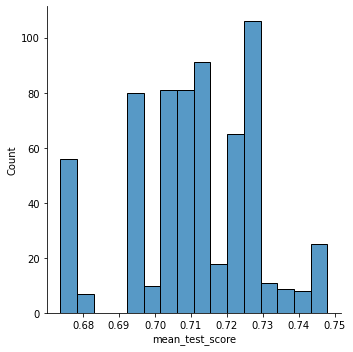

In [ ]:
x = df_filtrado["mean_test_score"] 
y = df_filtrado["mean_test_score"] 
plt.scatter(x, y)


###


In [ ]:
#DataDecisionTree.to_csv('DataDecisionTreeFINAL.csv')

### Analisis Especifico

In [ ]:
#Se definen los hiperparametros a optimizar
max_depth = 100 #ponerlo de 10 en 10 hasta 100
minsamplesplit = 20 #dejarlo de 1 en 1 hasta 10
minsampleleaf = 20 #dejarlo de 1 en 1 hasta 10

param_grid = {"model__max_depth": list(range(99, max_depth+1)),
              "model__min_samples_split": list(range(1, minsamplesplit+1)),
              "model__min_samples_leaf": list(range(1, minsampleleaf+1))
                                        }

#param_grid = {"model__max_depth": list(range(80, max_depth+1,5)),
#              "model__min_samples_split": list(range(1, minsamplesplit+1)),
#              "model__min_samples_leaf": list(range(1, minsampleleaf+1))
#                                        }

In [ ]:
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

DataDecisionTreeESPECIFICO = []
DataDecisionTreeINDIVIDUALESPECIFICO = []

for f in all_files:
    train_features = pd.read_excel(f)
    # Train, test split.
    data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
    X_train, X_test, targets_train, targets_test = data_split

    # Find the best model per target.
    for target in range(targets.shape[1]):
        # Getting the target.
        y_train = targets_train.iloc[:, target]
        y_test = targets_test.iloc[:, target]

    # Model definition.
        pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                          ("model", DecisionTreeRegressor(random_state=4444))])
    # By default GridSearchCV uses a 5-kfold validation strategy.
        search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)  
        saveinfo = search.fit(X_train.values, y_train.values)
        informacion = search.cv_results_
        

    # Getting the test score.
        y_hat_test = search.predict(X_test.values)
        test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
        #print(f"Columna: {targets.columns[target]}")
        #print(f"Best CV score: {search.best_score_:0.3f}")
        #print(f"Test score: {test_score:0.3f}")
        #print(f"Best Parameters:\n {search.best_params_}")
        #print("")

    #Save stats
        DataDecisionTreeESPECIFICO.append([f,targets.columns[target],search.best_score_,test_score,search.best_params_])
        DataDecisionTreeINDIVIDUALESPECIFICO.append([f,targets.columns[target],informacion])


print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/skl

In [ ]:
DataDecisionTreeESPECIFICO = pd.DataFrame(DataDecisionTreeESPECIFICO)
DataDecisionTreeESPECIFICO.head(20)

,0,1,2,3,4
0,/work/GWALK.xlsx,Cadencia,0.748254,0.638144,"{'model__max_depth': 99, 'model__min_samples_l..."
1,/work/GWALK.xlsx,Velocidad,0.922135,0.928789,"{'model__max_depth': 99, 'model__min_samples_l..."
2,/work/GWALK.xlsx,LongitudZancada,0.865739,0.917862,"{'model__max_depth': 99, 'model__min_samples_l..."


In [ ]:
#DataDecisionTreeINDIVIDUAL = pd.DataFrame(search.cv_results_)
DataDecisionTreeINDIVIDUALESPECIFICO = pd.DataFrame(DataDecisionTreeINDIVIDUALESPECIFICO)
#DataDecisionTreeINDIVIDUAL[['mean_test_score','param_model__max_depth','param_model__min_samples_leaf','param_model__min_samples_split','params']]
DataDecisionTreeINDIVIDUALESPECIFICO

DataDecisionTreeINDIVIDUALESPECIFICO.iloc[0,2]
NewDataDecisionTreeINDIVIDUALESPECIFICO = pd.DataFrame(DataDecisionTreeINDIVIDUALESPECIFICO.iloc[0,2])
NewDataDecisionTreeINDIVIDUALESPECIFICO = NewDataDecisionTreeINDIVIDUALESPECIFICO[['mean_test_score','param_model__max_depth','param_model__min_samples_leaf','param_model__min_samples_split','params']]
NewDataDecisionTreeINDIVIDUALESPECIFICO


,mean_test_score,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params
0,NaN,99,1,1,"{'model__max_depth': 99, 'model__min_samples_l..."
1,0.729853,99,1,2,"{'model__max_depth': 99, 'model__min_samples_l..."
2,0.723924,99,1,3,"{'model__max_depth': 99, 'model__min_samples_l..."
3,0.737007,99,1,4,"{'model__max_depth': 99, 'model__min_samples_l..."
4,0.724399,99,1,5,"{'model__max_depth': 99, 'model__min_samples_l..."
...,...,...,...,...,...
795,0.647678,100,20,16,"{'model__max_depth': 100, 'model__min_samples_..."
796,0.647678,100,20,17,"{'model__max_depth': 100, 'model__min_samples_..."
797,0.647678,100,20,18,"{'model__max_depth': 100, 'model__min_samples_..."
798,0.647678,100,20,19,"{'model__max_depth': 100, 'model__min_samples_..."


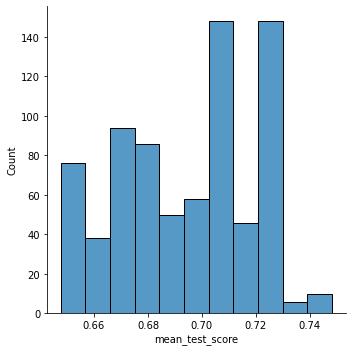

In [ ]:
sns.displot(NewDataDecisionTreeINDIVIDUALESPECIFICO['mean_test_score'])

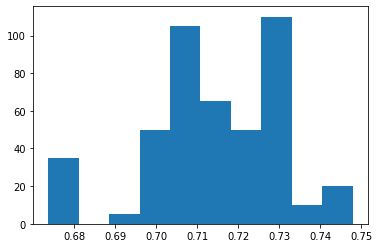

In [ ]:
plt.hist(NewDataDecisionTreeINDIVIDUALESPECIFICO['mean_test_score'], bins=10);

In [ ]:
df_Especifico = NewDataDecisionTreeINDIVIDUALESPECIFICO[NewDataDecisionTreeINDIVIDUALESPECIFICO["mean_test_score"] > 0.65]
df_Especifico["param_model__max_depth"] = pd.to_numeric(df_Especifico["param_model__max_depth"])
df_Especifico["param_model__min_samples_leaf"] = pd.to_numeric(df_Especifico["param_model__min_samples_leaf"])
df_Especifico["param_model__min_samples_split"] = pd.to_numeric(df_Especifico["param_model__min_samples_split"])
df_Especifico

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,mean_test_score,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params
1,0.729853,99,1,2,"{'model__max_depth': 99, 'model__min_samples_l..."
2,0.723924,99,1,3,"{'model__max_depth': 99, 'model__min_samples_l..."
3,0.737007,99,1,4,"{'model__max_depth': 99, 'model__min_samples_l..."
4,0.724399,99,1,5,"{'model__max_depth': 99, 'model__min_samples_l..."
5,0.695574,99,1,6,"{'model__max_depth': 99, 'model__min_samples_l..."
...,...,...,...,...,...
775,0.653328,100,19,16,"{'model__max_depth': 100, 'model__min_samples_..."
776,0.653328,100,19,17,"{'model__max_depth': 100, 'model__min_samples_..."
777,0.653328,100,19,18,"{'model__max_depth': 100, 'model__min_samples_..."
778,0.653328,100,19,19,"{'model__max_depth': 100, 'model__min_samples_..."


In [ ]:
_deepnote_run_altair(df_Especifico, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"mean_test_score","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"param_model__min_samples_split","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
x = df_Especifico["mean_test_score"] 
y1 = df_Especifico["param_model__max_depth"] 
y2 = df_Especifico["param_model__min_samples_leaf"] 
y3 = df_Especifico["param_model__min_samples_split"]


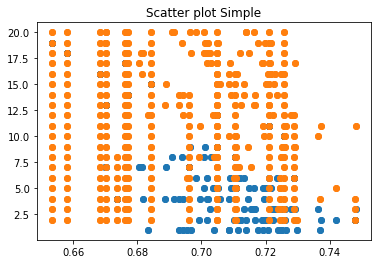

In [ ]:
#plt.scatterplot(x, y1, marker='*',color='darkred',linestyle='--')
#plt.scatterplot(x, y2, marker='+',color='darkblue',linestyle='-.')

plt.scatter(x, y2)
plt.scatter(x, y3)
plt.title("Scatter plot Simple");
plt.show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b789780-dffe-4295-a515-7c11bc987883' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>